In [1]:
from keras.datasets import cifar10
#Load du lieu cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

from keras import models
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from keras.utils import to_categorical # one hot encoding cho output

170498071/170498071 [==============================] - 4s 0us/step


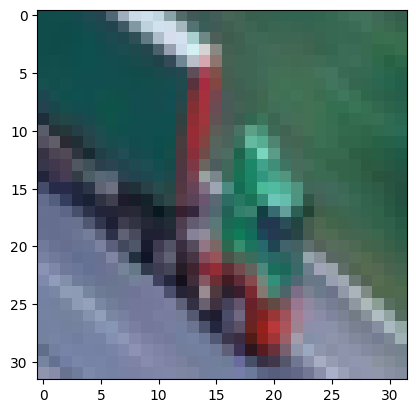

Vat nay la:  truck


In [ ]:
#Hien thi hinh anh vi du tu bo du lieu
hinh = x_train[50]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()

#danh sach cua cifar10
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

so = y_train[50][0]
print('Vat nay la: ', class_name[so])

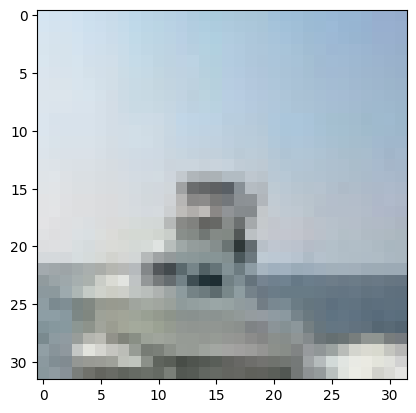

Vat nay la:  ship


In [ ]:
hinh = x_train[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()

so_1 = y_train[100][0]
print('Vat nay la: ', class_name[so_1])

In [ ]:
print('X_train: ', x_train.shape)
print('X_test: ', x_test.shape)
print('Y_train: ',y_train.shape)
print('Y_test: ',y_test.shape)


X_train:  (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)
Y_train:  (50000, 1)
Y_test:  (10000, 1)


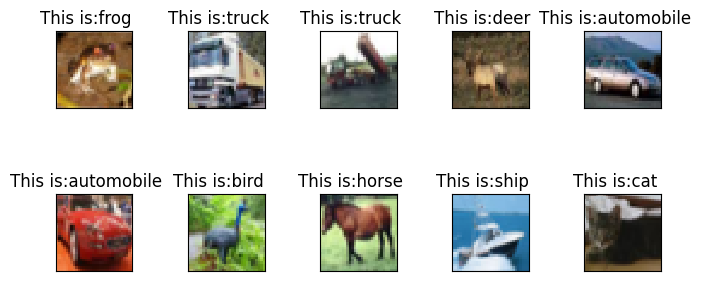

In [ ]:
for i in range (10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='hot_r', interpolation = 'none')
  so_2 = y_train[i][0]
  
  plt.title('This is:{}   '.format(class_name[so_2]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
#Xay dung mo hinh
model = Sequential()
#lop an thu 1
model.add(Dense(1024, activation ='relu', input_shape = (32*32*3,), name = 'layer1'))
#lop an thu 2
model.add(Dense(512,activation = 'relu', name = 'Layer2'))
#lop an thu 3
model.add(Dense(256,activation = 'relu', name = 'Layer3'))
#lop an thu 4
model.add(Dense(10, activation='softmax',name = 'Layer4'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1024)              3146752   
                                                                 
 Layer2 (Dense)              (None, 512)               524800    
                                                                 
 Layer3 (Dense)              (None, 256)               131328    
                                                                 
 Layer4 (Dense)              (None, 10)                2570      
                                                                 
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Tien xu ly du lieu dau vao
x_train = x_train.reshape((50000,32*32*3)) # chia hinh anh 2D thanh 1D de khop voi input network
x_train= x_train.astype('float32')/255   # vi anh la cac day mau tu 0 den 255 nen phai chuyen thanh kieu so thuc 

x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
#Compile va huan luyen mo hinh voi epochs = 30
import keras.metrics as metrics 
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
391/391 [==============================] - 30s 74ms/step - loss: 1.8168 - accuracy: 0.3463
Epoch 2/30
391/391 [==============================] - 28s 72ms/step - loss: 1.7001 - accuracy: 0.3914
Epoch 3/30
391/391 [==============================] - 29s 75ms/step - loss: 1.6268 - accuracy: 0.4176
Epoch 4/30
391/391 [==============================] - 28s 72ms/step - loss: 1.5709 - accuracy: 0.4388
Epoch 5/30
391/391 [==============================] - 29s 75ms/step - loss: 1.5279 - accuracy: 0.4529
Epoch 6/30
391/391 [==============================] - 29s 75ms/step - loss: 1.4891 - accuracy: 0.4672
Epoch 7/30
391/391 [==============================] - 29s 74ms/step - loss: 1.4494 - accuracy: 0.4845
Epoch 8/30
391/391 [==============================] - 29s 73ms/step - loss: 1.4207 - accuracy: 0.4949
Epoch 9/30
391/391 [==============================] - 28s 73ms/step - loss: 1.3896 - accuracy: 0.5023
Epoch 10/30
391/391 [==============================] - 29s 74ms/step - loss: 1.363

1/1 [==============================] - 0s 79ms/step
This is deer


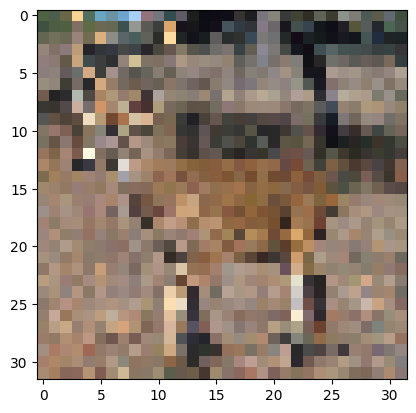

In [ ]:
#Du doan tren hinh anh moi
from keras.utils import load_img
from keras.utils.image_utils import img_to_array 
import numpy as np

url = 'ci_far_10_deerrr.png'
img = load_img(url)
#plt.imshow(img)

img = load_img(url,target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
#img = img[:,:,0]
img = img.reshape((1,32*32*3))
img = img.astype('float32')/255
so = int(np.argmax(model.predict(img),axis =1))
print("This is",class_name[so])

In [ ]:
#save
model.save('cifar_10.h')